# Coco tools

I expect this notebook to be deleted before we hand the project in, but thought it's worth understanding how pycoco tools works - particularly for image segmentation, but also other functionality that we haven't covered in labs like loading categories.

In [23]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
from PIL import Image
import matplotlib.pyplot as plt
import pylab
from pathlib import Path
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# yeah - shouldn't really use pylab now - think it's old fashioned!
pylab?

Type:        module
String form: <module 'pylab' from '/Users/alexxcollins/miniforge3/envs/deep/lib/python3.9/site-packages/pylab.py'>
File:        ~/miniforge3/envs/deep/lib/python3.9/site-packages/pylab.py
Docstring:  
.. warning::
   Since heavily importing into the global namespace may result in unexpected
   behavior, the use of pylab is strongly discouraged. Use `matplotlib.pyplot`
   instead.

`pylab` is a module that includes `matplotlib.pyplot`, `numpy`, `numpy.fft`,
`numpy.linalg`, `numpy.random`, and some additional functions, all within
a single namespace. Its original purpose was to mimic a MATLAB-like way
of working by importing all functions into the global namespace. This is
considered bad style nowadays.


In [3]:
io?

Type:        module
String form: <module 'skimage.io' from '/Users/alexxcollins/miniforge3/envs/deep/lib/python3.9/site-packages/skimage/io/__init__.py'>
File:        ~/miniforge3/envs/deep/lib/python3.9/site-packages/skimage/io/__init__.py
Docstring:  
Utilities to read and write images in various formats.

The following plug-ins are available:

========== ==============================================================
Plugin     Description
---------- --------------------------------------------------------------
qt         Fast image display using the Qt library. Deprecated since
           0.18. Will be removed in 0.20.
imread     Image reading and writing via imread
gdal       Image reading via the GDAL Library (www.gdal.org)
simpleitk  Image reading and writing via SimpleITK
gtk        Fast image display using the GTK library
pil        Image reading via the Python Imaging Library
fits       FITS image reading via PyFITS
matplotlib Display or save images using Matplotlib
tifffile 

In [11]:
datadir = Path('../Datasets/coco/images/train2017')
print(len(list(datadir.glob('*.jpg')))) #118287 image files
annFile = Path('../Datasets/coco/annotations/instances_train2017.json')

118287


In [12]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=7.79s)
creating index...
index created!


In [51]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories ({} in total): \n{}\n'.format(len(nms), ' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}\n'.format(' '.join(nms)))

print('cats is a {}'.format(type(cats)))
print('each entry in cats is a {}'.format(type(cats[0])))
print('cats example: {}'.format(cats[0]))

COCO categories (80 in total): 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
accessory appliance indoor vehicle furniture kitchen animal electronic food sports person outdoor

cats is a <class 'list'>
each entry in cats is a <class 'dict'>
cats example: {'supercategory': 'person', 'id': 1, 'name': 'person'}


In [35]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds);
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print('{} images with person, dog and skateboard present'.format(len(imgIds)))
print('\ncoco.loadImgs loads a list.\nEach entry is a dictionary containing data about the image')
print('example below:\n')
img

65 images with person, dog and skateboard present

coco.loadImgs loads a list.
Each entry is a dictionary containing data about the image
example below:



{'license': 1,
 'file_name': '000000551795.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000551795.jpg',
 'height': 640,
 'width': 433,
 'date_captured': '2013-11-18 09:32:01',
 'flickr_url': 'http://farm5.staticflickr.com/4039/4540176064_5e360a2d6c_z.jpg',
 'id': 551795}

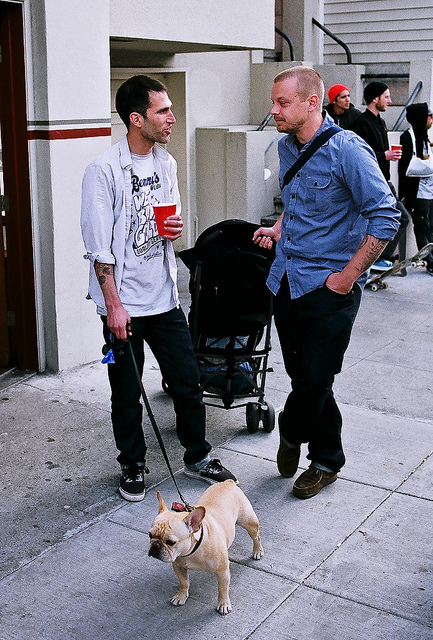

In [37]:
I = Image.open(datadir/img['file_name'])
I

### annIds give all masks, bboxes etc in an image

So there can be several annIds per image!

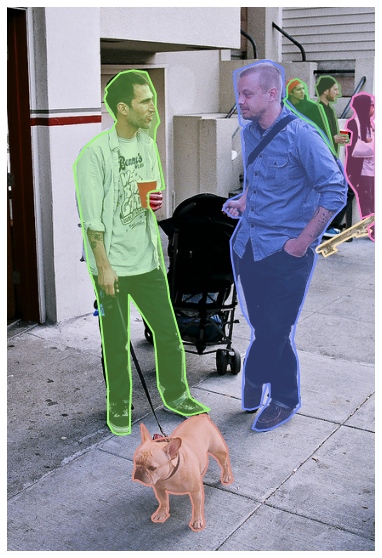

In [39]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [46]:
tb = coco.getCatIds(catNms=['toothbrush'])
img = coco.getImgIds(catIds=tb)
tb_cats = coco.loadCats(tb)
tb_cats

[{'supercategory': 'indoor', 'id': 90, 'name': 'toothbrush'}]

In [47]:
tb

[90]

In [49]:
all_cats = coco.getCatIds()
# add background class
all_cats.insert(0,0)
# get names of cateogories
all_names = coco.loadCats(coco.getCatIds())
names = [item['name'] for item in all_names]
# choose the categories you want to work with
# VERY CAREFUL WITH THIS LIST! SOME CLASSES ARE MISSING, TO TRAIN THE MODEL
# YOU NEED TO ADJUST THE CLASS ID!!!
selected_class_ids = coco.getCatIds(catNms=['toothbrush'])
adjusted_class_ids = {}
for id, cl in enumerate(all_cats):
    adjusted_class_ids[cl] = id
    #print(id, cl)
print ("ADJUSTED CLASS IDS:")
print(adjusted_class_ids) 

ADJUSTED CLASS IDS:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 27: 25, 28: 26, 31: 27, 32: 28, 33: 29, 34: 30, 35: 31, 36: 32, 37: 33, 38: 34, 39: 35, 40: 36, 41: 37, 42: 38, 43: 39, 44: 40, 46: 41, 47: 42, 48: 43, 49: 44, 50: 45, 51: 46, 52: 47, 53: 48, 54: 49, 55: 50, 56: 51, 57: 52, 58: 53, 59: 54, 60: 55, 61: 56, 62: 57, 63: 58, 64: 59, 65: 60, 67: 61, 70: 62, 72: 63, 73: 64, 74: 65, 75: 66, 76: 67, 77: 68, 78: 69, 79: 70, 80: 71, 81: 72, 82: 73, 84: 74, 85: 75, 86: 76, 87: 77, 88: 78, 89: 79, 90: 80}
